<a href="https://colab.research.google.com/github/nupursjsu/RL_Project/blob/main/Stock_Market_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Automatic Stock Trading Using Deep Reinforcement Learning

In this project we aim to build a deep reinforcement learning scheme that automatically learns a stock trading strategy by maximizing investment return.

---

Hongyang Yang, Xiao-Yang Liu, Shan Zhong, and Anwar Walid. 2020. Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy. In ICAIF ’20: ACM International Conference on AI in Finance, Oct. 15–16, 2020, Manhattan, NY. ACM, New York, NY, USA.

---



#Installing necessary libraries 

In [ ]:
# Model Building Requirements
!pip install numpy==1.16.4
!pip install pandas==1.0.3
!pip install stockstats
!pip install scikit-learn==0.21.0
!pip install gym==0.15.3
!pip install stable-baselines[mpi]
!pip install tensorflow==1.15.4

!pip install joblib==0.15.1

# plot
!pip install matplotlib==3.2.1

 # testing requirements
!pip install pytest>=5.3.2,<6.0.0

 # packaging
!pip install setuptools>=41.4.0,<42.0.0
!pip install wheel>=0.33.6,<0.34.0



     |████████████████████████████████| 17.3MB 341kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


     |████████████████████████████████| 10.0MB 6.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.3 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 1.0.3 which is incompatible.
  Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


     |████████████████████████████████| 6.6MB 6.0MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 1.6MB 5.2MB/s 
     |████████████████████████████████| 1.0MB 34.8MB/s 
  Created wheel for gym: filename=gym-0.15.3-cp36-none-any.whl size=1644971 sha256=7f5de6c2d58c7672501a5cf6d0bd5e1f99c18d040f2646aebb78c33a48fc5c90
  Stored in directory: /root/.cache/pip/wheels/8a/71/10/30f9b16332ecfd6318ac290445c696fe809bcbe40a05f9a799
Successfully built gym
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.2.2 which is incompatible.
  Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
  Found existing installation: cloudpickle 1.3

/bin/bash: 6.0.0: No such file or directory
/bin/bash: 42.0.0: No such file or directory
/bin/bash: 0.34.0: No such file or directory


# Downloading Dataset 

# Wharton Research Data Services (WRDS)

We track and select the Dow Jones 30 stock and use historical daily data from 01/01/2009 to 05/08/2020 to train the agent and test the performance. The dataset is downloaded from Compustat database accessed through Wharton Research Data Services (WRDS)


WRDS is a web-based business data research service from The Wharton School of the University of Pennsylvania. Provides access to financial, accounting, banking, economics, marketing, and public policy databases through a uniform, web-based interface. Strengths include deep archives of historical data, a common web interface for access to all WRDS databases, and a variety of output file formats.

Source : https://www.library.hbs.edu/Find/Databases/WRDS-Wharton-Research-Data-Services

We have acquired copy of data and stored it in our private google drive

In [ ]:
!gdown --id 1BA2CqyCGOxusz39NUS-wG0b3ZN7SviBL

Downloading...
From: https://drive.google.com/uc?id=1BA2CqyCGOxusz39NUS-wG0b3ZN7SviBL
To: /content/data.zip
100% 1.90M/1.90M [00:00<00:00, 60.6MB/s]


Extracting the data and keeping it ready for consumption

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [ ]:
!pip install preprocessing
!pip install config

     |████████████████████████████████| 358kB 4.9MB/s 
     |████████████████████████████████| 1.2MB 9.5MB/s 
     |████████████████████████████████| 1.4MB 15.9MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-cp36-none-any.whl size=1367707 sha256=3224ce60d27b7df3de0f1628d8ddc61958c99143e13726d51c809691e7abd9a6
  Stored in directory: /root/.cache/pip/wheels/36/f1/5c/f667347d86a3a534ba4c0127eed4389f929916e3ec88bb461a
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


# Loading Dataset

Preprocessing steps :
Using Standard formulas we dervie these metrics and joining with turbulence dataset

MACD: Moving Average Convergence Divergence (MACD) is calculated using close price. RSI: Relative Strength Index 

(RSI) is calculated using close price. 

CCI: Commodity Channel Index (CCI) is calculated using high, low and close price. 

ADX: Average Directional Index (ADX) is calculated using high, low and close price.

Turbulence Index (TI): Market turbulence is the unexpected rising and falling of the stock market. TI signifies turbulence.

In [ ]:
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as Sdf

def load_dataset(*, file_name: str) -> pd.DataFrame:
    """
    load csv dataset from path
    :return: (df) pandas dataframe
    """
    #_data = pd.read_csv(f"{config.DATASET_DIR}/{file_name}")
    _data = pd.read_csv(file_name)
    return _data

def data_split(df,start,end):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df.datadate >= start) & (df.datadate < end)]
    data=data.sort_values(['datadate','tic'],ignore_index=True)
    #data  = data[final_columns]
    data.index = data.datadate.factorize()[0]
    return data

def calcualte_price(df):
    """
    calcualte adjusted close price, open-high-low price and volume
    :param data: (df) pandas dataframe
    :return: (df) pandas dataframe
    """
    data = df.copy()
    data = data[['datadate', 'tic', 'prccd', 'ajexdi', 'prcod', 'prchd', 'prcld', 'cshtrd']]
    data['ajexdi'] = data['ajexdi'].apply(lambda x: 1 if x == 0 else x)


    """
    adjcp = adjusted closing prices
    open price
    highest price of the day 
    volume of the stocks
    """
    data['adjcp'] = data['prccd'] / data['ajexdi']
    data['open'] = data['prcod'] / data['ajexdi']
    data['high'] = data['prchd'] / data['ajexdi']
    data['low'] = data['prcld'] / data['ajexdi']
    data['volume'] = data['cshtrd']

    data = data[['datadate', 'tic', 'adjcp', 'open', 'high', 'low', 'volume']]
    data = data.sort_values(['tic', 'datadate'], ignore_index=True)
    return data

def add_technical_indicator(df):
    """
    calcualte technical indicators
    use stockstats package to add technical inidactors
    :param data: (df) pandas dataframe
    :return: (df) pandas dataframe
    """
    stock = Sdf.retype(df.copy())

    stock['close'] = stock['adjcp']
    unique_ticker = stock.tic.unique()

    macd = pd.DataFrame()
    rsi = pd.DataFrame()
    cci = pd.DataFrame()
    dx = pd.DataFrame()

    #temp = stock[stock.tic == unique_ticker[0]]['macd']
    for i in range(len(unique_ticker)):
        ## macd - Moving Average convergence and divergence
        temp_macd = stock[stock.tic == unique_ticker[i]]['macd']
        temp_macd = pd.DataFrame(temp_macd)
        macd = macd.append(temp_macd, ignore_index=True)
        ## rsi - Relative strength index
        temp_rsi = stock[stock.tic == unique_ticker[i]]['rsi_30']
        temp_rsi = pd.DataFrame(temp_rsi)
        rsi = rsi.append(temp_rsi, ignore_index=True)
        ## cci - commodity channel index
        temp_cci = stock[stock.tic == unique_ticker[i]]['cci_30']
        temp_cci = pd.DataFrame(temp_cci)
        cci = cci.append(temp_cci, ignore_index=True)
        ## adx - average directional index
        temp_dx = stock[stock.tic == unique_ticker[i]]['dx_30']
        temp_dx = pd.DataFrame(temp_dx)
        dx = dx.append(temp_dx, ignore_index=True)


    df['macd'] = macd
    df['rsi'] = rsi
    df['cci'] = cci
    df['adx'] = dx

    return df



def preprocess_data():
    """data preprocessing pipeline"""

    df = load_dataset(file_name=TRAINING_DATA_FILE)
    # get data after 2009
    df = df[df.datadate>=20090000]
    # calcualte adjusted price
    df_preprocess = calcualte_price(df)
    # add technical indicators using stockstats
    df_final=add_technical_indicator(df_preprocess)
    # fill the missing values at the beginning
    df_final.fillna(method='bfill',inplace=True)
    return df_final

def add_turbulence(df):
    """
    add turbulence index from a precalcualted dataframe
    :param data: (df) pandas dataframe
    :return: (df) pandas dataframe
    """
    turbulence_index = calcualte_turbulence(df)
    df = df.merge(turbulence_index, on='datadate')
    df = df.sort_values(['datadate','tic']).reset_index(drop=True)
    return df



def calcualte_turbulence(df):
    """calculate turbulence index based on dow 30"""
    # can add other market assets
    
    df_price_pivot=df.pivot(index='datadate', columns='tic', values='adjcp')
    unique_date = df.datadate.unique()
    # start after a year
    start = 252
    turbulence_index = [0]*start
    #turbulence_index = [0]
    count=0
    for i in range(start,len(unique_date)):
        current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
        hist_price = df_price_pivot[[n in unique_date[0:i] for n in df_price_pivot.index ]]
        
        
        cov_temp = hist_price.cov()

        #yt - mean
        current_temp=(current_price - np.mean(hist_price,axis=0))

        # (yt- mean)inverse*(yt-mean)
        temp = current_temp.values.dot(np.linalg.inv(cov_temp)).dot(current_temp.values.T)
        if temp>0:
            count+=1
            if count>2:
                turbulence_temp = temp[0][0]
            else:
                #avoid large outlier because of the calculation just begins
                turbulence_temp=0
        else:
            turbulence_temp=0
        turbulence_index.append(turbulence_temp)
    
    
    turbulence_index = pd.DataFrame({'datadate':df_price_pivot.index,
                                     'turbulence':turbulence_index})
    return turbulence_index

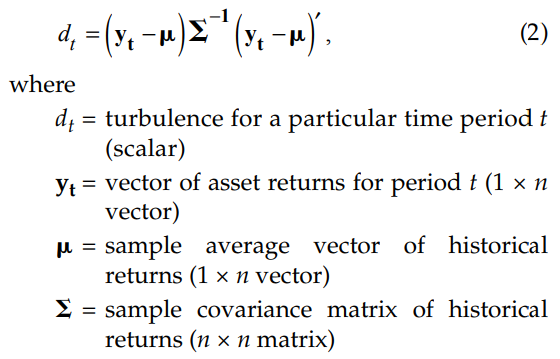

## Mapping data input file

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pathlib

#import finrl

import pandas as pd
import datetime
import os


TRAINING_DATA_FILE = "/content/data/data/dow_30_2009_2020.csv"

now = datetime.datetime.now()
TRAINED_MODEL_DIR = f"trained_models/{now}"
os.makedirs(TRAINED_MODEL_DIR)
TURBULENCE_DATA = "/content/data/data/dow30_turbulence_index.csv"
TESTING_DATA_FILE = "test.csv"




# Training Environment 

1)intitialse Env variables:

2)define sell stock

3)define buy stock

4)define step function : perform action , get reward and calculate sharpe ratio and return next state.



In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle

# shares normalization factor
# 100 shares per trade
HMAX_NORMALIZE = 100
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001
#faster convergence
REWARD_SCALING = 1e-4

class StockEnvTrain(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.df = df

        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (181,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False             
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() + \
                      self.data.cci.values.tolist() + \
                      self.data.adx.values.tolist()
        # initialize reward
        self.reward = 0
        self.cost = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.trades = 0
        #self.reset()
        self._seed()


    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            #update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)

            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass

    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        # print('available_amount:{}'.format(available_amount))

        #update balance
        
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)

        self.state[index+STOCK_DIM+1] += min(available_amount, action)

        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):

        self.terminal = self.day >= len(self.df.index.unique())-1


        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('results/account_value_train.png')
            plt.close()

            #end_total_asset = balacnce + (No of stock * prices) -- for all stocks
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            

            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('results/account_value_train.csv')


            df_total_value.columns = ['account_value']
            # daily return = percent change of balance 
            df_total_value['daily_return']=df_total_value.pct_change(1)

            # formula for sharpe ratio https://www.gstatic.com/education/formulas/images_long_sheet/en/sharpe_ratio.svg
            # max return with min risk
            sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                  df_total_value['daily_return'].std()

            df_rewards = pd.DataFrame(self.rewards_memory)
            
            return self.state, self.reward, self.terminal,{}

        else:

            actions = actions * HMAX_NORMALIZE

            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))


            argsort_actions = np.argsort(actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]


            # indexes of stocks to buy and sell is selected and operations are performed

            for index in sell_index:

                self._sell_stock(index, actions[index])

            for index in buy_index:

                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state

            self.state =  [self.state[0]] + \
                    self.data.adjcp.values.tolist() + \
                    list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) + \
                    self.data.macd.values.tolist() + \
                    self.data.rsi.values.tolist() + \
                    self.data.cci.values.tolist() + \
                    self.data.adx.values.tolist()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.asset_memory.append(end_total_asset)
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset            
            # print("step_reward:{}".format(self.reward))
            self.rewards_memory.append(self.reward)
            
            #scale the reward, so that we can improve the model and help convergence
            self.reward = self.reward*REWARD_SCALING



        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() + \
                      self.data.cci.values.tolist() + \
                      self.data.adx.values.tolist() 
        # iteration += 1 
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

# Validation Environment 

Here we will use turbulance index to assess risk

1)intitialse Env variables:

2)define sell stock

3)define buy stock

4)define step function : perform action , get reward and calculate sharpe ratio and return next state.



In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle

# shares normalization factor
# 100 shares per trade
HMAX_NORMALIZE = 100
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001

# turbulence index: 90-150 reasonable threshold
#TURBULENCE_THRESHOLD = 140
REWARD_SCALING = 1e-4

class StockEnvValidation(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df, day = 0, turbulence_threshold=140, iteration=''):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.df = df
        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (181,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() + \
                      self.data.cci.values.tolist() + \
                      self.data.adx.values.tolist()
        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        #self.reset()
        self._seed()
        
        self.iteration=iteration


    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.turbulence<self.turbulence_threshold:
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += \
                self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 (1- TRANSACTION_FEE_PERCENT)
                
                self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
                self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
        else:
            # if turbulence goes over threshold, just clear out all positions 
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              (1- TRANSACTION_FEE_PERCENT)
                self.state[index+STOCK_DIM+1] =0
                self.cost += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        if self.turbulence< self.turbulence_threshold:
            available_amount = self.state[0] // self.state[index+1]
            # print('available_amount:{}'.format(available_amount))
            
            #update balance
            self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                              (1+ TRANSACTION_FEE_PERCENT)

            self.state[index+STOCK_DIM+1] += min(available_amount, action)
            
            self.cost+=self.state[index+1]*min(available_amount, action)* \
                              TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            # if turbulence goes over threshold, just stop buying
            pass
        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('results/account_value_validation_{}.png'.format(self.iteration))
            plt.close()
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('results/account_value_validation_{}.csv'.format(self.iteration))
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            #print("previous_total_asset:{}".format(self.asset_memory[0]))           

            #print("end_total_asset:{}".format(end_total_asset))
            #print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):61]))- self.asset_memory[0] ))
            #print("total_cost: ", self.cost)
            #print("total trades: ", self.trades)

            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            sharpe = (4**0.5)*df_total_value['daily_return'].mean()/ \
                  df_total_value['daily_return'].std()
            #print("Sharpe: ",sharpe)
            
            #df_rewards = pd.DataFrame(self.rewards_memory)
            #df_rewards.to_csv('results/account_rewards_trade_{}.csv'.format(self.iteration))
            
            # print('total asset: {}'.format(self.state[0]+ sum(np.array(self.state[1:29])*np.array(self.state[29:]))))
            #with open('obs.pkl', 'wb') as f:  
            #    pickle.dump(self.state, f)
            
            return self.state, self.reward, self.terminal,{}

        else:
            # print(np.array(self.state[1:29]))

            actions = actions * HMAX_NORMALIZE
            #actions = (actions.astype(int))
            if self.turbulence>=self.turbulence_threshold:
                actions=np.array([-HMAX_NORMALIZE]*STOCK_DIM)
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            #print("begin_total_asset:{}".format(begin_total_asset))
            
            argsort_actions = np.argsort(actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            self.turbulence = self.data['turbulence'].values[0]
            #print(self.turbulence)
            #load next state
            # print("stock_shares:{}".format(self.state[29:]))
            self.state =  [self.state[0]] + \
                    self.data.adjcp.values.tolist() + \
                    list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) + \
                    self.data.macd.values.tolist() + \
                    self.data.rsi.values.tolist() + \
                    self.data.cci.values.tolist() + \
                    self.data.adx.values.tolist()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.asset_memory.append(end_total_asset)
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset            
            # print("step_reward:{}".format(self.reward))
            self.rewards_memory.append(self.reward)
            
            self.reward = self.reward*REWARD_SCALING

        return self.state, self.reward, self.terminal, {}

    def reset(self):  
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        #self.iteration=self.iteration
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist()  + \
                      self.data.cci.values.tolist()  + \
                      self.data.adx.values.tolist() 
            
        return self.state
    
    def render(self, mode='human',close=False):
        return self.state
    

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

# Trading Environment 

1)intitialse Env variables:

2)define sell stock

3)define buy stock

4)define step function : perform action , get reward and calculate sharpe ratio and return next state.



In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle

# shares normalization factor
# 100 shares per trade
HMAX_NORMALIZE = 100
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001

# turbulence index: 90-150 reasonable threshold
#TURBULENCE_THRESHOLD = 140
REWARD_SCALING = 1e-4

class StockEnvTrade(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0,turbulence_threshold=140
                 ,initial=True, previous_state=[], model_name='', iteration=''):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.df = df
        self.initial = initial
        self.previous_state = previous_state
        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (181,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold
        # initialize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() + \
                      self.data.cci.values.tolist() + \
                      self.data.adx.values.tolist()
        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        #self.reset()
        self._seed()
        self.model_name=model_name        
        self.iteration=iteration


    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.turbulence<self.turbulence_threshold:
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += \
                self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 (1- TRANSACTION_FEE_PERCENT)
                
                self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
                self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
        else:
            # if turbulence goes over threshold, just clear out all positions 
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              (1- TRANSACTION_FEE_PERCENT)
                self.state[index+STOCK_DIM+1] =0
                self.cost += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        if self.turbulence< self.turbulence_threshold:
            available_amount = self.state[0] // self.state[index+1]
            # print('available_amount:{}'.format(available_amount))
            
            #update balance
            self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                              (1+ TRANSACTION_FEE_PERCENT)

            self.state[index+STOCK_DIM+1] += min(available_amount, action)
            
            self.cost+=self.state[index+1]*min(available_amount, action)* \
                              TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            # if turbulence goes over threshold, just stop buying
            pass
        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('results/account_value_trade_{}_{}.png'.format(self.model_name, self.iteration))
            plt.close()
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('results/account_value_trade_{}_{}.csv'.format(self.model_name, self.iteration))
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0]))           

            print("end_total_asset:{}".format(end_total_asset))
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))- self.asset_memory[0] ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)

            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            sharpe = (4**0.5)*df_total_value['daily_return'].mean()/ \
                  df_total_value['daily_return'].std()
            print("Sharpe: ",sharpe)
            
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('results/account_rewards_trade_{}_{}.csv'.format(self.model_name, self.iteration))
            
            # print('total asset: {}'.format(self.state[0]+ sum(np.array(self.state[1:29])*np.array(self.state[29:]))))
            #with open('obs.pkl', 'wb') as f:  
            #    pickle.dump(self.state, f)
            
            return self.state, self.reward, self.terminal,{}

        else:
            # print(np.array(self.state[1:29]))

            actions = actions * HMAX_NORMALIZE
            #actions = (actions.astype(int))
            if self.turbulence>=self.turbulence_threshold:
                actions=np.array([-HMAX_NORMALIZE]*STOCK_DIM)
                
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            #print("begin_total_asset:{}".format(begin_total_asset))
            
            argsort_actions = np.argsort(actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            self.turbulence = self.data['turbulence'].values[0]
            #print(self.turbulence)
            #load next state
            # print("stock_shares:{}".format(self.state[29:]))
            self.state =  [self.state[0]] + \
                    self.data.adjcp.values.tolist() + \
                    list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) + \
                    self.data.macd.values.tolist() + \
                    self.data.rsi.values.tolist() + \
                    self.data.cci.values.tolist() + \
                    self.data.adx.values.tolist()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.asset_memory.append(end_total_asset)
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset            
            # print("step_reward:{}".format(self.reward))
            self.rewards_memory.append(self.reward)
            
            self.reward = self.reward*REWARD_SCALING


        return self.state, self.reward, self.terminal, {}

    def reset(self):  
        if self.initial:
            self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
            self.day = 0
            self.data = self.df.loc[self.day,:]
            self.turbulence = 0
            self.cost = 0
            self.trades = 0
            self.terminal = False 
            #self.iteration=self.iteration
            self.rewards_memory = []
            #initiate state
            self.state = [INITIAL_ACCOUNT_BALANCE] + \
                          self.data.adjcp.values.tolist() + \
                          [0]*STOCK_DIM + \
                          self.data.macd.values.tolist() + \
                          self.data.rsi.values.tolist()  + \
                          self.data.cci.values.tolist()  + \
                          self.data.adx.values.tolist() 
        else:
            previous_total_asset = self.previous_state[0]+ \
            sum(np.array(self.previous_state[1:(STOCK_DIM+1)])*np.array(self.previous_state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.asset_memory = [previous_total_asset]
            #self.asset_memory = [self.previous_state[0]]
            self.day = 0
            self.data = self.df.loc[self.day,:]
            self.turbulence = 0
            self.cost = 0
            self.trades = 0
            self.terminal = False 
            #self.iteration=iteration
            self.rewards_memory = []
            #initiate state
            #self.previous_state[(STOCK_DIM+1):(STOCK_DIM*2+1)]
            #[0]*STOCK_DIM + \

            self.state = [ self.previous_state[0]] + \
                          self.data.adjcp.values.tolist() + \
                          self.previous_state[(STOCK_DIM+1):(STOCK_DIM*2+1)]+ \
                          self.data.macd.values.tolist() + \
                          self.data.rsi.values.tolist()  + \
                          self.data.cci.values.tolist()  + \
                          self.data.adx.values.tolist() 
            
        return self.state
    
    def render(self, mode='human',close=False):
        return self.state
    

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

# Defining Models

**1) A2c :**

A2C utilizes an advantage function to reduce the    variance of the policy gradient.

 A2C uses copies of the same agent working in parallel to update gradients with different data samples. 
 
Each agent works independently to interact with the same environment. After all of the parallel agents finish calculating their gradients, A2C uses a coordinator to pass the average gradients over all the agents to a global network.

https://stable-baselines.readthedocs.io/en/master/modules/a2c.html

**2) SAC** :

Instead of only seeking to maximize the lifetime rewards, SAC seeks to also maximize the entropy of the policy. 

We want a high entropy in our policy to explicitly encourage exploration, to encourage the policy to assign equal probabilities to actions that have same or nearly equal Q-values, and also to ensure that it does not collapse into repeatedly selecting a particular action that could exploit some inconsistency in the approximated Q function. 

Therefore, SAC overcomes the brittleness problem by encouraging the policy network to explore and not assign a very high probability to any one part of the range of actions.

https://stable-baselines.readthedocs.io/en/master/modules/sac.html


**3) TD3**


TD3 is inspired by double DQN and solves the issue of the overestimation of critic values and has the following changes over DDPG.

https://stable-baselines.readthedocs.io/en/master/modules/td3.html
 

1.   Using Two main critic networks apart from their target networks.
2.   Delaying update for actor-network.
3.   Action noise regularisation.

In [ ]:
# common library
import pandas as pd
import numpy as np
import time
import gym

# RL models from stable-baselines
from stable_baselines import GAIL, SAC
from stable_baselines import ACER
from stable_baselines import PPO2
from stable_baselines import A2C
from stable_baselines import DDPG
from stable_baselines import TD3

from stable_baselines.ddpg.policies import DDPGPolicy
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines.common.vec_env import DummyVecEnv
# from preprocessing.preprocessors import *
# from config import config

# customized env
# from env.EnvMultipleStock_train import StockEnvTrain
# from env.EnvMultipleStock_validation import StockEnvValidation
# from env.EnvMultipleStock_trade import StockEnvTrade

def train_A2C(env_train, model_name, timesteps=25000):
    """A2C model"""
    """Reduce the Variance of policy gradient, parallel copies of agents and compute happens"""


    start = time.time()
    model = A2C('MlpPolicy', env_train, verbose=0)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    model.save(f"{TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (A2C): ', (end - start) / 60, ' minutes')
    return model

def train_SAC(env_train, model_name, timesteps=25000):
    """SAC model"""
    """try to increase entropy and hence ensures more exploration"""

    start = time.time()
    model = SAC('MlpPolicy', env_train, verbose=0)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    model.save(f"{TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (SAC): ', (end - start) / 60, ' minutes')
    return model

def train_TD3(env_train, model_name, timesteps=25000):
    """TD3 model"""
    """TD3 is inspired by double DQN and solves the issue of the overestimation of critic values"""

    start = time.time()
    model = TD3('MlpPolicy', env_train, verbose=0)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    model.save(f"{TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (TD3): ', (end - start) / 60, ' minutes')
    return model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# run_ensemble_strategy

Run Models one by one for each day for a quarter.

1.   save the sharpe ratio of each model separtely
2.   Later using the sharpe ratio as a decider , decide which model is performing better, use it to trade the next quarter
3.   Also during that keep improving model weights by continually training all the models simultaneously 









In [ ]:
def run_ensemble_strategy(df, unique_trade_date, rebalance_window, validation_window) -> None:
    """Ensemble Strategy that combines PPO, A2C and DDPG"""
    print("============Start Ensemble Strategy============")
    # for ensemble model, it's necessary to feed the last state
    # of the previous model to the current model as the initial state
    last_state_ensemble = []
    
    a2c_sharpe_list = []

    td3_sharpe_list = []

    sac_sharpe_list = []

    model_use = []

    # based on the analysis of the in-sample data
    #turbulence_threshold = 140
    insample_turbulence = df[(df.datadate<20151000) & (df.datadate>=20090000)]
    insample_turbulence = insample_turbulence.drop_duplicates(subset=['datadate'])

    #select threshold of upto .90 quantile
    insample_turbulence_threshold = np.quantile(insample_turbulence.turbulence.values, .90)
    print(rebalance_window + validation_window, len(unique_trade_date), rebalance_window)
    start = time.time()
    
    #rebalnce=valudation=63, unique trae dates are all unique dates we wiil be processing

    for i in range(rebalance_window + validation_window, len(unique_trade_date), rebalance_window):
        print('iterations number:-',i,rebalance_window,unique_trade_date)
        print("============================================")
        ## initial state is empty
        if i - rebalance_window - validation_window == 0:
            # inital state
            initial = True
        else:
            # previous state
            initial = False

        # Tuning trubulence index based on historical data
        # Turbulence lookback window is one quarter
        end_date_index = df.index[df["datadate"] == unique_trade_date[i - rebalance_window - validation_window]].to_list()[-1]
        start_date_index = end_date_index - validation_window*30 + 1

        historical_turbulence = df.iloc[start_date_index:(end_date_index + 1), :]
        #historical_turbulence = df[(df.datadate<unique_trade_date[i - rebalance_window - validation_window]) & (df.datadate>=(unique_trade_date[i - rebalance_window - validation_window - 63]))]


        historical_turbulence = historical_turbulence.drop_duplicates(subset=['datadate'])

        historical_turbulence_mean = np.mean(historical_turbulence.turbulence.values)

        if historical_turbulence_mean > insample_turbulence_threshold:
            # if the mean of the historical data is greater than the 90% quantile of insample turbulence data
            # then we assume that the current market is volatile,
            # therefore we set the 90% quantile of insample turbulence data as the turbulence threshold
            # meaning the current turbulence can't exceed the 90% quantile of insample turbulence data
            turbulence_threshold = insample_turbulence_threshold
        else:
            # if the mean of the historical data is less than the 90% quantile of insample turbulence data
            # then we tune up the turbulence_threshold, meaning we lower the risk
            turbulence_threshold = np.quantile(insample_turbulence.turbulence.values, 1)
        print("turbulence_threshold: ", turbulence_threshold)

        ############## Environment Setup starts ##############
        ## training env

        ##Creates a simple vectorized wrapper for multiple environments, calling each environment in sequence on the current Python process
        train = data_split(df, start=20090000, end=unique_trade_date[i - rebalance_window - validation_window])
        env_train = DummyVecEnv([lambda: StockEnvTrain(train)])

        ## validation env
        validation = data_split(df, start=unique_trade_date[i - rebalance_window - validation_window],
                                end=unique_trade_date[i - rebalance_window])
        env_val = DummyVecEnv([lambda: StockEnvValidation(validation,
                                                          turbulence_threshold=turbulence_threshold,
                                                          iteration=i)])
        obs_val = env_val.reset()
        ############## Environment Setup ends ##############

        ############## Training and Validation starts ##############
        print("======Model training from: ", 20090000, "to ",
              unique_trade_date[i - rebalance_window - validation_window])
        # print("training: ",len(data_split(df, start=20090000, end=test.datadate.unique()[i-rebalance_window]) ))
        # print("==============Model Training===========")
        print("======A2C Training========")
        model_a2c = train_A2C(env_train, model_name="A2C_30k_dow_{}".format(i))
        print("======A2C Validation from: ", unique_trade_date[i - rebalance_window - validation_window], "to ",
              unique_trade_date[i - rebalance_window])
        DRL_validation(model=model_a2c, test_data=validation, test_env=env_val, test_obs=obs_val)
        sharpe_a2c = get_validation_sharpe(i)
        print("A2C Sharpe Ratio: ", sharpe_a2c)



        print("======TD3 Training========")
        model_td3 = train_TD3(env_train, model_name="TD3_30k_dow_{}".format(i))
        print("======TD3 Validation from: ", unique_trade_date[i - rebalance_window - validation_window], "to ",
              unique_trade_date[i - rebalance_window])
        DRL_validation(model=model_td3, test_data=validation, test_env=env_val, test_obs=obs_val)
        sharpe_td3 = get_validation_sharpe(i)
        print("TD3 Sharpe Ratio: ", sharpe_td3)


        print("======SAC Training========")
        model_sac = train_SAC(env_train, model_name="SAC_30k_dow_{}".format(i))
        print("======SAC Validation from: ", unique_trade_date[i - rebalance_window - validation_window], "to ",
              unique_trade_date[i - rebalance_window])
        DRL_validation(model=model_sac, test_data=validation, test_env=env_val, test_obs=obs_val)
        sharpe_sac = get_validation_sharpe(i)
        print("SAC Sharpe Ratio: ", sharpe_sac)




        a2c_sharpe_list.append(sharpe_a2c)
        td3_sharpe_list.append(sharpe_td3)
        sac_sharpe_list.append(sharpe_sac)
        
        # Model Selection based on sharpe ratio
        all_sharpes= [ sharpe_a2c  ,sharpe_td3 ,sharpe_sac ]
        names_sharpes =[
                        (model_a2c,'A2C'),             
                        (model_td3,'TD3'),
                        (model_sac,'SAC')         
                        ]
        MAX_SHARPE=all_sharpes.index(max(all_sharpes))
        model_ensemble=names_sharpes[MAX_SHARPE][0]
        model_use.append(names_sharpes[MAX_SHARPE][1])

        print('*'*100)
        print('picked up technique',names_sharpes[MAX_SHARPE][0])

        ############## Training and Validation ends ##############

        ############## Trading starts ##############
        print("======Trading from: ", unique_trade_date[i - rebalance_window], "to ", unique_trade_date[i])
        #print("Used Model: ", model_ensemble)
        last_state_ensemble = DRL_prediction(df=df, model=model_ensemble, name="ensemble",
                                             last_state=last_state_ensemble, iter_num=i,
                                             unique_trade_date=unique_trade_date,
                                             rebalance_window=rebalance_window,
                                             turbulence_threshold=turbulence_threshold,
                                             initial=initial)
        # print("============Trading Done============")
        ############## Trading ends ##############

    end = time.time()
    print("Ensemble Strategy took: ", (end - start) / 60, " minutes")

In [ ]:
def DRL_prediction(df,
                   model,
                   name,
                   last_state,
                   iter_num,
                   unique_trade_date,
                   rebalance_window,
                   turbulence_threshold,
                   initial):
    ### make a prediction based on trained model###

    ## trading env
    trade_data = data_split(df, start=unique_trade_date[iter_num - rebalance_window], end=unique_trade_date[iter_num])
    env_trade = DummyVecEnv([lambda: StockEnvTrade(trade_data,
                                                   turbulence_threshold=turbulence_threshold,
                                                   initial=initial,
                                                   previous_state=last_state,
                                                   model_name=name,
                                                   iteration=iter_num)])
    obs_trade = env_trade.reset()

    for i in range(len(trade_data.index.unique())):
        action, _states = model.predict(obs_trade)
        obs_trade, rewards, dones, info = env_trade.step(action)
        if i == (len(trade_data.index.unique()) - 2):
            # print(env_test.render())
            last_state = env_trade.render()

    df_last_state = pd.DataFrame({'last_state': last_state})
    df_last_state.to_csv('results/last_state_{}_{}.csv'.format(name, i), index=False)
    return last_state


def DRL_validation(model, test_data, test_env, test_obs) -> None:
    ###validation process###
    for i in range(len(test_data.index.unique())):
        action, _states = model.predict(test_obs)
        test_obs, rewards, dones, info = test_env.step(action)


def get_validation_sharpe(iteration):
    ###Calculate Sharpe ratio based on validation results###
    df_total_value = pd.read_csv('results/account_value_validation_{}.csv'.format(iteration), index_col=0)
    df_total_value.columns = ['account_value_train']
    df_total_value['daily_return'] = df_total_value.pct_change(1)
    sharpe = (4 ** 0.5) * df_total_value['daily_return'].mean() / \
             df_total_value['daily_return'].std()
    return sharpe




In [ ]:
# common library
import pandas as pd
import numpy as np
import time
from stable_baselines.common.vec_env import DummyVecEnv
import os

def run_model() -> None:
    """Train the model."""

    # read and preprocess data
    preprocessed_path = "done_data.csv"
    if os.path.exists(preprocessed_path):
        data = pd.read_csv(preprocessed_path, index_col=0)
    else:
        data = preprocess_data()
        data = add_turbulence(data)
        data.to_csv(preprocessed_path)

    print(data.head())
    print(data.size)


    unique_trade_date = data[(data.datadate > 20151001)&(data.datadate <= 20200707)].datadate.unique()
    print(unique_trade_date)



    rebalance_window = 63
    validation_window = 63
    
    ## Ensemble Strategy
    run_ensemble_strategy(df=data, 
                          unique_trade_date= unique_trade_date,
                          rebalance_window = rebalance_window,
                          validation_window=validation_window)

    #_logger.info(f"saving model version: {_version}")

In [ ]:
import os
try:
  os.mkdir('results')
except:
  pass

In [ ]:
run_model()

   datadate   tic      adjcp       open  ...    rsi        cci    adx  turbulence
0  20090102  AAPL  12.964286  12.268571  ...  100.0  66.666667  100.0         0.0
1  20090102   AXP  19.330000  18.570000  ...  100.0  66.666667  100.0         0.0
2  20090102    BA  45.250000  42.800000  ...  100.0  66.666667  100.0         0.0
3  20090102   CAT  46.910000  44.910000  ...    0.0  66.666667  100.0         0.0
4  20090102  CSCO  16.960000  16.410000  ...  100.0  66.666667  100.0         0.0

[5 rows x 12 columns]
1053360
[20151002 20151005 20151006 ... 20200702 20200706 20200707]
============Start Ensemble Strategy============
126 1198 63
iterations number:- 126 63
turbulence_threshold:  171.09407156310274
======Model training from:  20090000 to  20151002
======A2C Training========
Training time (A2C):  1.3146259784698486  minutes
======A2C Validation from:  20151002 to  20160104
A2C Sharpe Ratio:  0.05257116716227322
======TD3 Training========
Training time (TD3):  2.4528332352638245  min

#Conclusion

We have used an ensemble method to automatically select the best performing agent among A2C, SAC, and TD3 to trade based on the Sharpe ratio.

We got a **total Profit of 461371 dollars on the initial investment of 1000000 dollars** using this ensemble strategy.